In [159]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim, linear_approx

$R_S >= \frac{1}{2\pi f_1C_S}$

$R_S = -\frac{V_{GS}}{I_{DS}}, R_G=100\text{kΩ}$

$f_1 = \frac{1}{2\pi C_CR_G} = 50\text{Hz}$

In [160]:
g_m = 1.37e-3
V_DS = 10
V_GS = 0.67
I_D = 5e-4
R_G = 100e3
f_1 = 50

In [161]:
R_S = V_GS/I_D
C_C = 1/(2*np.pi*f_1*R_G)
C_Smin = 1/(2*np.pi*f_1*R_S)
C_S = 10e-6
Z_S = 1/(1/R_S + 2*np.pi*f_1*C_S*1j)
print(f"{R_S=}, {C_C=}, {C_S=} >= {C_Smin}, {np.abs(Z_S/R_S)=}")

R_S=1340.0, C_C=3.183098861837907e-08, C_S=1e-05 >= 2.3754469118193335e-06, np.abs(Z_S/R_S)=0.23111359017851912


In [162]:
# 実測
C_S = 10.21e-6
C_C = 32.71e-9
R_L = 19.81e3
R_S = 988 + 297.6

In [163]:
data_d = pd.read_excel("data.xlsx", sheet_name="(4)(d)", skiprows=[1])
data_d.sort_values(by="v_i", axis=0, inplace=True, ascending=True)
data_d

,v_i,v_o
0,0.372,0.84
1,0.580,1.48
2,0.896,2.24
3,1.210,3.20
4,1.410,3.68
10,2.880,7.68
5,4.400,11.50
6,5.040,13.00
7,6.000,14.80
8,6.960,16.00


In [164]:
data_3 = pd.read_excel("data.xlsx", sheet_name="(3)", skiprows=[0, 2], header=[0])
data_3.sort_values(by="V_GS", axis=0, inplace=True, ascending=True)
data_3

,V_GS,V_DS
0,0.00,0.559
6,0.10,0.638
18,0.15,0.686
7,0.20,0.740
8,0.30,0.953
9,0.40,2.166
19,0.45,3.675
1,0.50,5.080
20,0.55,6.790
10,0.60,8.216


# (d)$v_i$ - $v_o$特性

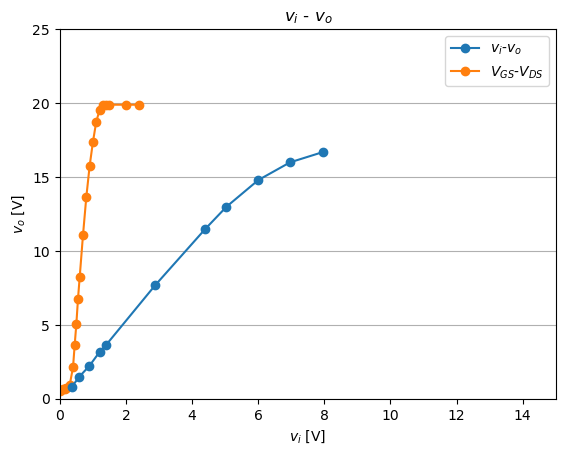

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="$v_i$ [V]", grid="y", ylabel="$v_o$ [V]", title="$v_i$ - $v_o$", xlim=(0, 15), ylim=(0, 25))
ax.plot(data_d["v_i"], data_d["v_o"], marker="o", label="$v_i$-$v_o$", zorder=5)
ax.plot(data_3["V_GS"], data_3["V_DS"], marker="o", label="$V_{GS}$-$V_{DS}$")
axessetting.apply_axes(ax)


# (e) 周波数特性

In [166]:
data_e = pd.read_excel("data.xlsx", sheet_name="(4)(e)", skiprows=[1])
data_e.sort_values(by="f", axis=0, inplace=True, ascending=True)
data_e["phase"] = data_e["time"]* data_e["f"] * 360 * 1e-3
data_e

,f,v_i,v_o,time,phase
0,20,2.40,1.52,12.0000,86.40
1,30,2.46,2.48,8.8000,95.04
2,50,2.50,3.92,6.4000,115.20
3,70,2.50,4.84,5.1000,128.52
4,100,2.40,5.52,3.9000,140.40
5,120,2.46,5.80,3.3500,144.72
6,150,2.40,6.00,-3.8000,-205.20
7,200,2.46,6.20,2.2000,158.40
8,250,2.46,6.24,1.8200,163.80
9,300,2.48,6.40,-1.8000,-194.40


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


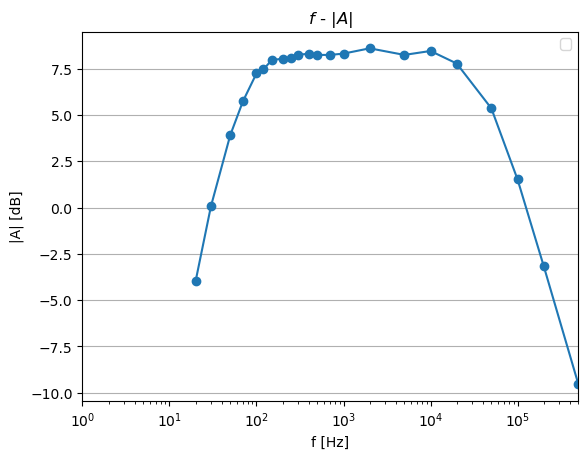

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="f [Hz]", grid="y", ylabel="|A| [dB]", title="$f$ - $|A|$", xscale="log", xlim=(1e1, 5e5))
ax.plot(data_e["f"], 20*np.log10(data_e["v_o"]/data_e["v_i"]), marker="o")
axessetting.apply_axes(ax)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


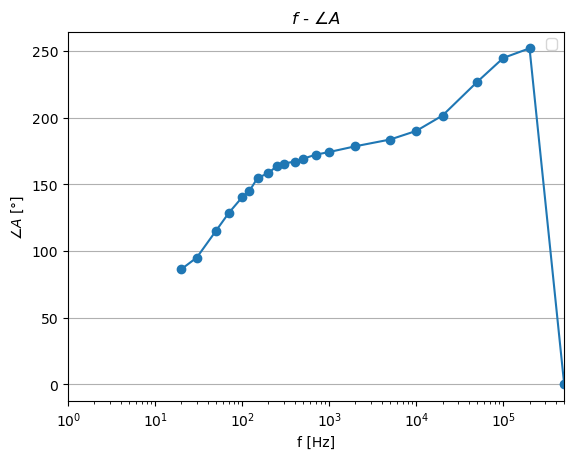

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="f [Hz]", grid="y", ylabel="$\\angle A$ [°]", title="$f$ - $\\angle A$", xscale="log", xlim=(1e1,5e5))
ax.plot(data_e["f"], data_e["phase"]%360.0, marker="o")
axessetting.apply_axes(ax)


# (f)

In [169]:
# 1kHz
Vin = 2.42
Vout = 2.40
time=500e-6

# plot

In [171]:
df_osc = pd.read_csv("File0.csv", skiprows=[1])
df_osc

,X,CH1,CH2,Unnamed: 3
0,-0.001208,-3.32,17.0,NaN
1,-0.001204,-3.24,17.0,NaN
2,-0.001200,-3.24,17.0,NaN
3,-0.001196,-3.20,16.8,NaN
4,-0.001192,-3.16,16.8,NaN
...,...,...,...,...
595,0.001172,3.28,1.6,NaN
596,0.001176,3.28,1.8,NaN
597,0.001180,3.36,1.6,NaN
598,0.001184,3.32,1.6,NaN


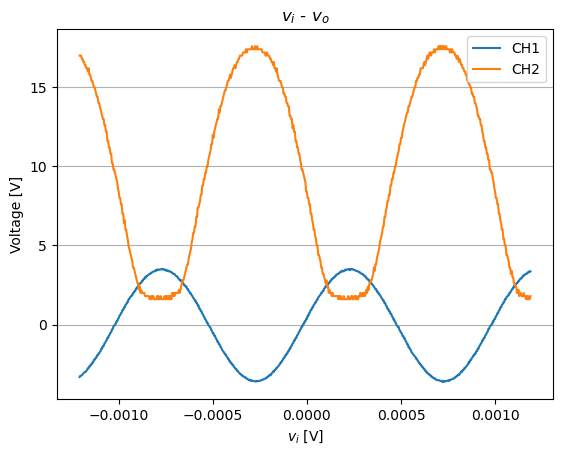

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="$v_i$ [V]", grid="y", ylabel="Voltage [V]", title="$v_i$ - $v_o$")
ax.plot(df_osc["X"], df_osc["CH1"], label="CH1", zorder=5)
ax.plot(df_osc["X"], df_osc["CH2"], label="CH2", zorder=5)
axessetting.apply_axes(ax)
